In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline

# Data Load

In [2]:
# Load data
properties_data = pd.read_csv('../Data/properties_2016.csv', low_memory=False)

train_data = pd.read_csv('../Data/train_2016_v2.csv')

submission_sample = pd.read_csv('../Data/sample_submission.csv')

label_documentation = pd.read_csv('../Data/zillow_data_dictionary.csv', encoding='ISO8859_1')

properties_data = properties_data.fillna(0)
transactions = pd.merge(train_data, properties_data, how='left', on=['parcelid'])
duplicate_records = train_data[train_data['parcelid'].duplicated()]['parcelid'].unique()

# Visualisation

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


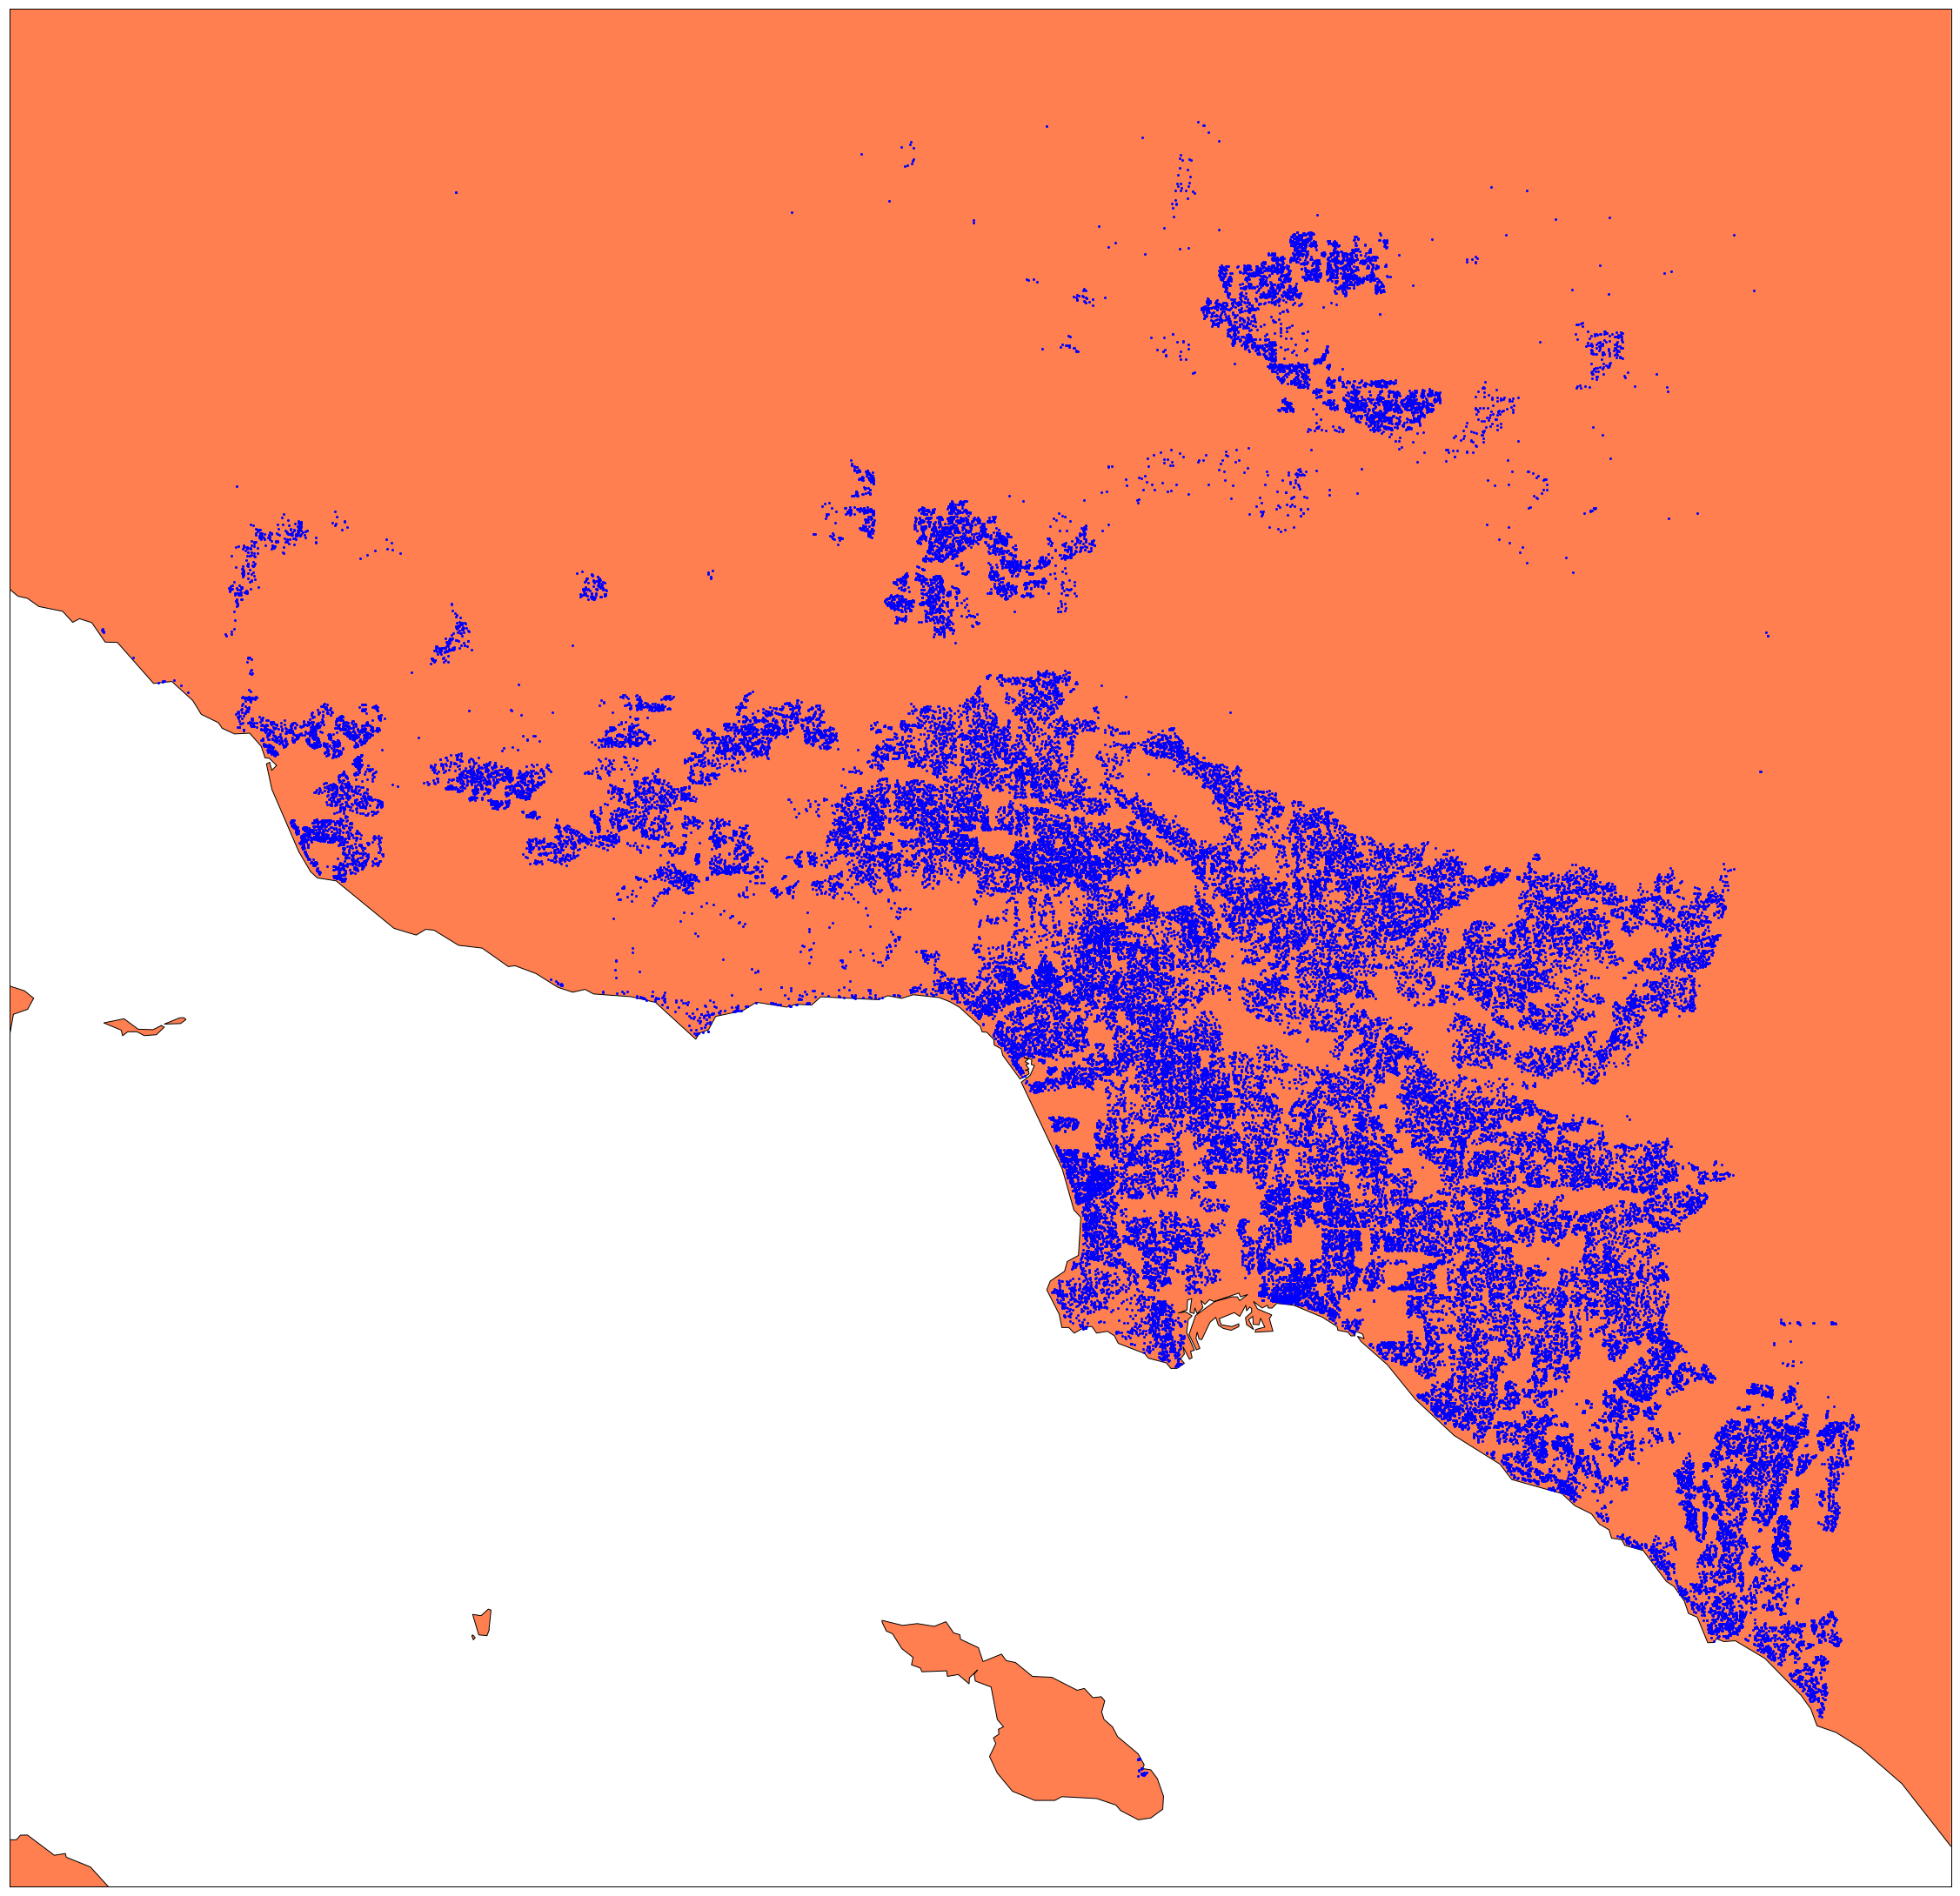

In [3]:
transactions['latitude'] = transactions['latitude']/1000000
transactions['longitude'] = transactions['longitude']/1000000

min_lat = transactions['latitude'].min()
max_lat = transactions['latitude'].max()
min_lon = transactions['longitude'].min()
max_lon = transactions['longitude'].max()

area = 0.1
fig = plt.figure(figsize=(40,40))
map = Basemap(projection='merc', lat_0 = np.mean([min_lat, max_lat]), lon_0 = np.mean([min_lon, max_lon]),
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=min_lon - area, llcrnrlat=min_lat - area,
    urcrnrlon=max_lon + area, urcrnrlat=max_lat + area)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = transactions['longitude'].values
lat = transactions['latitude'].values
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=2)

In [11]:
label_documentation

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [25]:
transactions['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

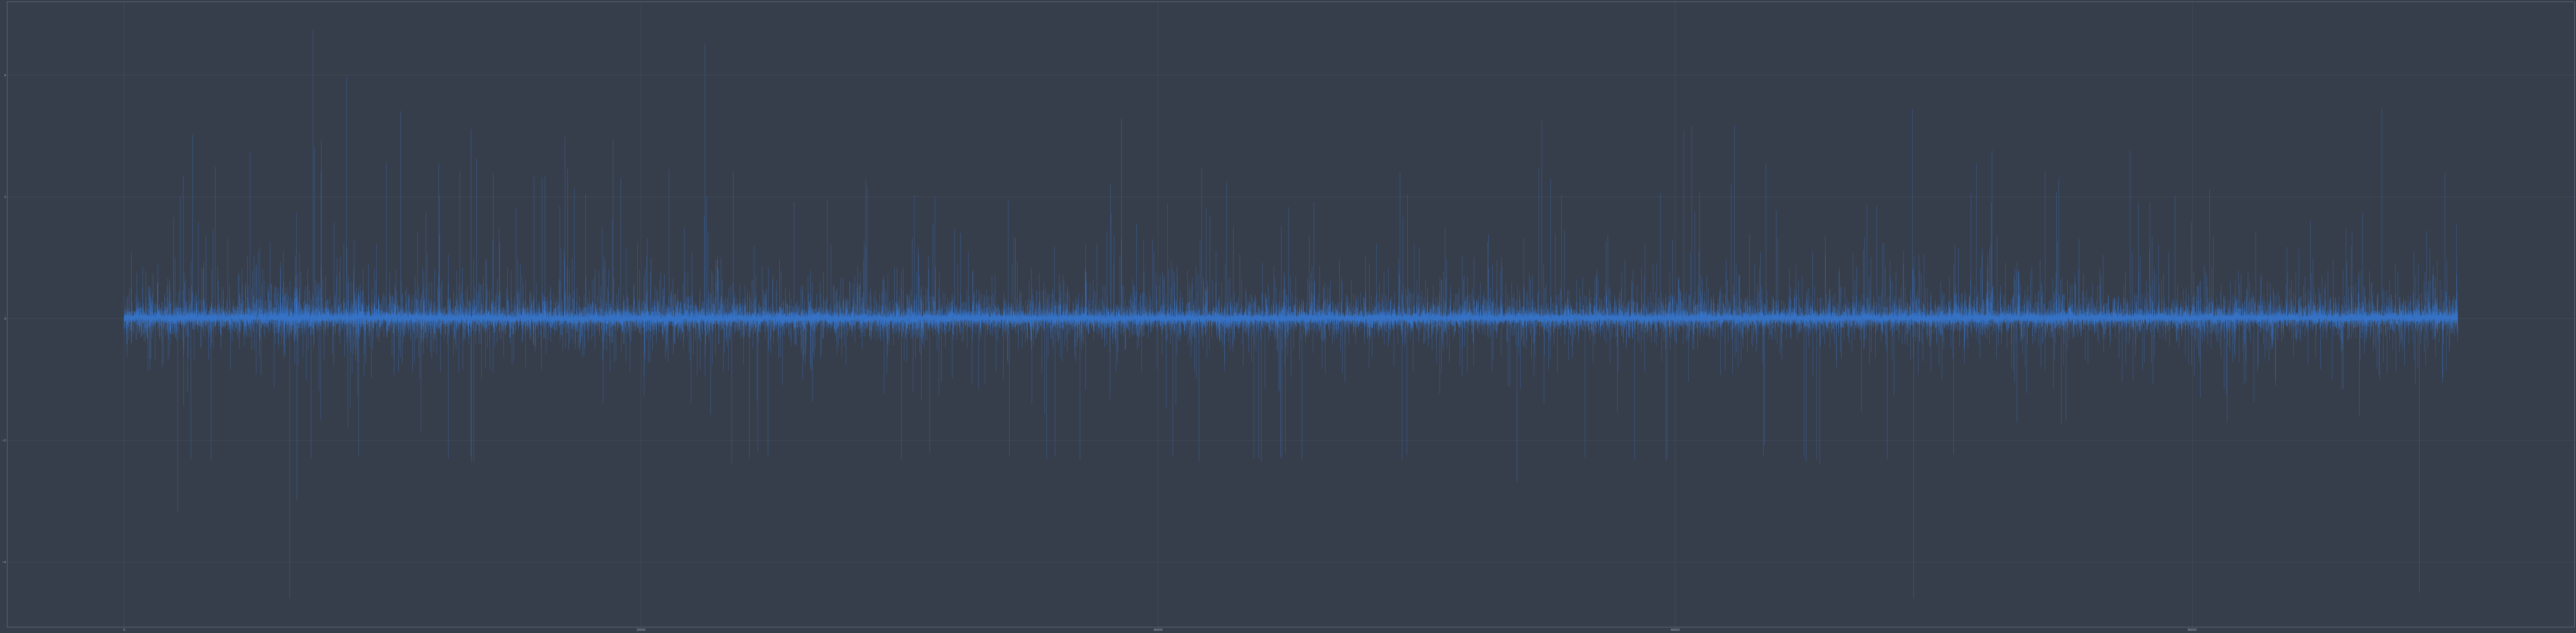

In [31]:
fig = plt.figure(figsize=(200,50))
plt.plot(transactions['logerror'], linewidth=0.5)

# Processing

In [5]:
# Building time features
transactions['transactiondate'] = pd.to_datetime(transactions['transactiondate'])
transactions['day_of_week'] = transactions['transactiondate'].dt.dayofweek
transactions['month_of_year'] = transactions['transactiondate'].dt.month
transactions['quarter'] = transactions['transactiondate'].dt.quarter
transactions['is_weekend'] = (transactions['day_of_week'] < 5).astype(int)

In [6]:
# Some set of features which would intuitively make sense to be correlated with the price of the house.
# However, given that the problem is to discover areas of improvement in the model, they might not contribute
# significantly. 
transactions_final_columns = ['day_of_week','month_of_year','quarter','is_weekend', 
                                   'architecturalstyletypeid','basementsqft','bathroomcnt',
                                   'bedroomcnt','buildingclasstypeid','buildingqualitytypeid',
                                   'finishedsquarefeet15','garagecarcnt', 'taxamount', 
                                   'lotsizesquarefeet','poolsizesum','regionidcity','roomcnt',
                                   'yearbuilt','numberofstories','fireplaceflag','yardbuildingsqft26']
x_all = transactions[transactions_final_columns]
y_all = transactions['logerror'].values

# Splits up train and test based on the given ration
ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x_all.values, y_all, test_size=ratio, random_state=69)

In [7]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

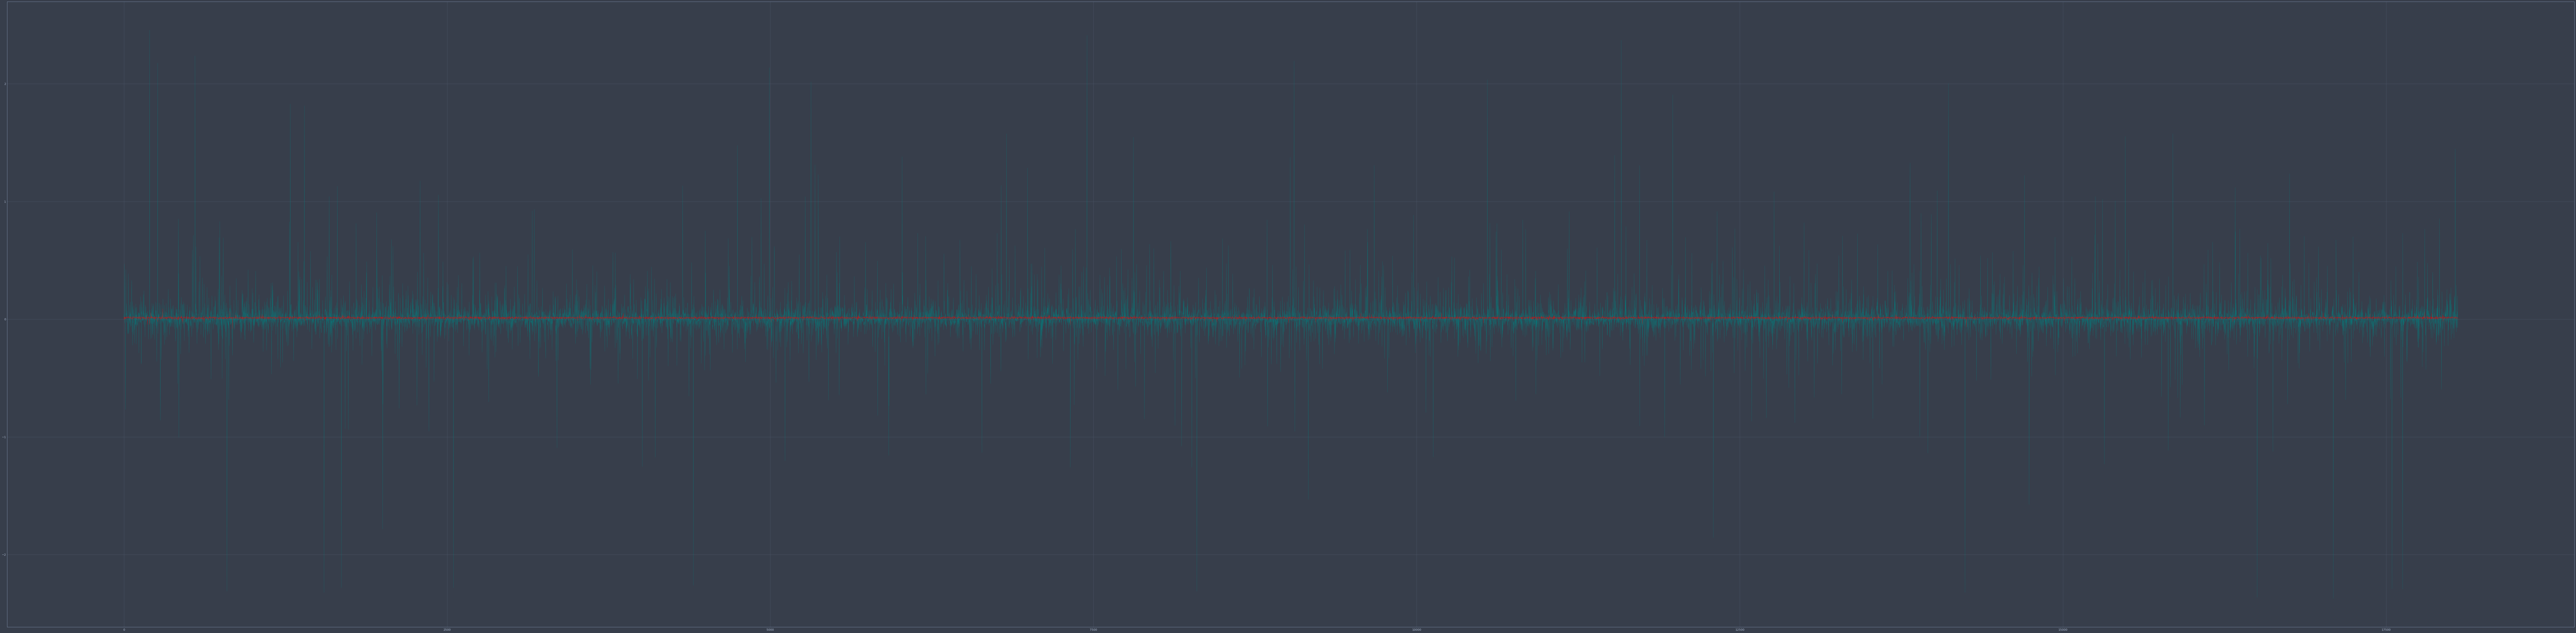

In [33]:
fig = plt.figure(figsize=(200, 50))
plt.plot(y_pred, color='red', zorder=4, linewidth=0.5)
plt.plot(y_test, color='teal',   zorder=3, linewidth=0.5)

In [9]:
model_lr.score(x_test, y_test)

0.001732710484184441

In [10]:
# Feature importance
pd.DataFrame(model_lr.coef_, columns=['Weight'], index=transactions_final_columns).sort_values('Weight', ascending=False)

,Weight
buildingclasstypeid,1.424106e-02
is_weekend,1.035864e-02
bathroomcnt,5.297435e-03
quarter,2.555904e-03
bedroomcnt,2.151582e-03
numberofstories,4.761907e-04
architecturalstyletypeid,3.991080e-04
garagecarcnt,2.728605e-04
basementsqft,2.940718e-05
lotsizesquarefeet,1.113482e-08
